---
## Step 0: Load The Data

(32, 32, 3)
count [ 180 1980 2010 1260 1770 1650  360 1290 1260 1320 1800 1170 1890 1920  690
  540  360  990 1080  180  300  270  330  450  240 1350  540  210  480  240
  390  690  210  599  360 1080  330  180 1860  270  300  210  210]

Labels vs Count to ensure this pair doesn't change post shuffling



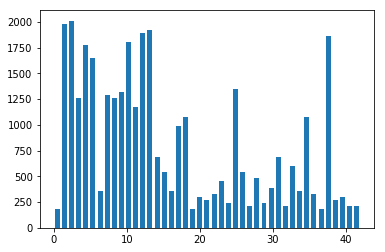

Before Augmentation 34799
0 : |----|----|----|----|----|----|----|----|----|----|----|----|-
1 : 
2 : 
3 : 
4 : 
5 : 
6 : |----|----|----|----|----|----|----|----|---
7 : 
8 : 
9 : 
10 : 
11 : 
12 : 
13 : 
14 : |----|----|
15 : |----|----|----|----|----|
16 : |----|----|----|----|----|----|----|----|---
17 : 
18 : 
19 : |----|----|----|----|----|----|----|----|----|----|----|----|-
20 : |----|----|----|----|----|----|----|----|----|----
21 : |----|----|----|----|----|----|----|----|----|----|--
22 : |----|----|----|----|----|----|----|----|----|-
23 : |----|----|----|----|----|----|----
24 : |----|----|----|----|----|----|----|----|----|----|----|
25 : 
26 : |----|----|----|----|----|
27 : |----|----|----|----|----|----|----|----|----|----|----|---
28 : |----|----|----|----|----|----|-
29 : |----|----|----|----|----|----|----|----|----|----|----|
30 : |----|----|----|----|----|----|----|----|
31 : |----|----|
32 : |----|----|----|----|----|----|----|----|----|----|----|---
33 : |----|-

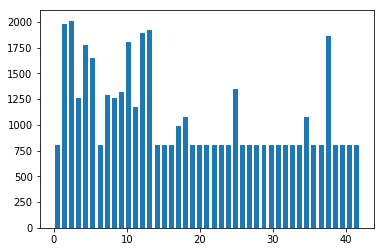

Training...
EPOCH 1    Validation Accuracy = 0.853
EPOCH 2    Validation Accuracy = 0.918
EPOCH 3    Validation Accuracy = 0.924
EPOCH 4    Validation Accuracy = 0.922
EPOCH 5    Validation Accuracy = 0.925
EPOCH 6    Validation Accuracy = 0.929
EPOCH 7    Validation Accuracy = 0.942
EPOCH 8    Validation Accuracy = 0.938
EPOCH 9    Validation Accuracy = 0.943
EPOCH 10    Validation Accuracy = 0.949
EPOCH 11    Validation Accuracy = 0.924
EPOCH 12    Validation Accuracy = 0.951
EPOCH 13    Validation Accuracy = 0.948
EPOCH 14    Validation Accuracy = 0.945
EPOCH 15    Validation Accuracy = 0.940
EPOCH 16    Validation Accuracy = 0.956
EPOCH 17    Validation Accuracy = 0.925
EPOCH 18    Validation Accuracy = 0.946
EPOCH 19    Validation Accuracy = 0.955
EPOCH 20    Validation Accuracy = 0.950
EPOCH 21    Validation Accuracy = 0.959
EPOCH 22    Validation Accuracy = 0.943
EPOCH 23    Validation Accuracy = 0.951
EPOCH 24    Validation Accuracy = 0.957
EPOCH 25    Validation Accuracy = 0.9

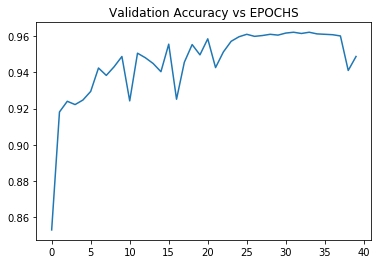

In [8]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import csv
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
import pickle
import random
import cv2

%matplotlib inline

# Load pickled data
# Pickle is used to serialize the data so that it can be saved to a disk

training_file = './data/train.p'
validation_file = './data/valid.p'
testing_file = './data/test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)

#Each pickled dataset is a dictionary of 4 keys
#dict_keys(['sizes', 'labels', 'features', 'coords'])
#print(train.keys())

X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']


####################################################################################################################
LEARN_RATE = 0.0009
BATCH_SIZE = 128
EPOCHS = 40
KEEP_PROB = 1.0

#Number of labels should be same as number of input images
assert(len(X_train) == len(y_train))
n_train = len(X_train)

assert(len(X_valid) == len(y_valid))
n_valid = len(X_valid)

assert(len(X_test) == len(y_test))
n_test = len(X_test)

# Image Shape
image_shape = X_train[0].shape
print(image_shape)
# Number of classes / labels
n_classes = len(np.unique(y_train))


def readcsv(file):
    with open(file) as csvfile:
        reader = csv.DictReader(csvfile)
        label_dict = {row['ClassId']:row['SignName'] for row in reader}
        return label_dict

count, label = np.unique(y_train, return_counts=True)
label_dict = readcsv('signnames.csv')

def get_label_name(label_no):
    return label_dict[label_no]

def grayscale(img_set):
    gray_img_set = []
    for img in img_set:
            gray_img_set.append(cv2.cvtColor(img, cv2.COLOR_RGB2GRAY))
    return gray_img_set


#Perform histogram equalization using CLAHE algorithm on grayscale images
def clahe_equalize(img_set):
    clahe_img_set = []
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(4,4))
    for img in img_set:
        clahe_img = np.expand_dims(clahe.apply(img), axis = 2)
        clahe_img_set.append(clahe_img)
    return clahe_img_set

def normalize(img_set):
    norm_img_set = []
    for img in img_set:
        norm_img_set.append((img - 127.5)/127.5)
    return norm_img_set

X_train_shuffle, y_train_shuffle = shuffle(X_train, y_train)
#X_train_gry = np.sum(X_train_shuffle/3, axis=3, keepdims=True)
X_train_gry = grayscale(X_train_shuffle)
X_train_clahe = clahe_equalize(X_train_gry)
#X_train_shuffle_normalized = (X_clahe - 128) / 128
X_train_shuffle_normalized = normalize(X_train_clahe)
X_train, y_train = X_train_shuffle_normalized, y_train_shuffle

#Shuffle, Normalize Validation Set
X_valid_shuffle, y_valid_shuffle = shuffle(X_valid, y_valid)
#X_valid_gry = np.sum(X_valid_shuffle/3, axis=3, keepdims=True)
X_valid_gry = grayscale(X_valid_shuffle)
X_valid_clahe = clahe_equalize(X_valid_gry)
#X_valid_shuffle_normalized = (X_chale - 128) / 128
X_valid_shuffle_normalized = normalize(X_valid_clahe)
X_valid, y_valid = X_valid_shuffle_normalized, y_valid_shuffle

#Shuffle, Normalize Test Set
X_test_shuffle, y_test_shuffle = shuffle(X_test, y_test)
X_test_gry = np.sum(X_test_shuffle/3, axis=3, keepdims=True)
X_test_shuffle_normalized = (X_test_gry - 128) / 128
X_test, y_test = X_test_shuffle_normalized, y_test_shuffle

#Augmentation
#To check if the count has changed after shuffling, which ideally shouldn't
label, count = np.unique(y_train_shuffle, return_counts=True)
print('count',count)
label_dict_shuffle = readcsv('signnames.csv')
print('\nLabels vs Count to ensure this pair doesn\'t change post shuffling\n')
count_var = []
for i, j in zip(count, label):
    #print('{} :: {}'.format(label_dict_shuffle[repr(j)], i))
    count_var.append(i)

########################################################################################################################

#Histogram display for original training set
hist, bins = np.histogram(y_train, bins=n_classes)
width = 0.7 * (bins[1] - bins[0])
center = (bins[:-1] + bins[1:]) /2
plt.bar(center, hist, align='center', width=width)
plt.show()

print('Before Augmentation', len(X_train))

#Data Augmentation
#print('X, y shapes:', X_train.shape, y_train.shape)

input_indices = []
output_indices = []

for class_n in range(n_classes):
    print(class_n, ': ', end='')
    class_indices = np.where(y_train == class_n) #This returns a tuple 0:array([  127,   259,   330 ...], dtype=int64), hence later we get only [0] element from this tuple
    n_samples = len(class_indices[0])
    if n_samples < 800:
        for i in range(800 - n_samples):
            input_indices.append(class_indices[0][i%n_samples])
            output_indices.append(len(X_train))
            new_img = X_train[class_indices[0][i % n_samples]]
            #new_img = random_translate(random_scaling(random_warp(random_brightness(new_img))))
            X_train = np.concatenate((X_train, [new_img]), axis=0)
            y_train = np.concatenate((y_train, [class_n]), axis=0)
            if i % 50 == 0:
                print('|', end='')
            elif i % 10 == 0:
                print('-',end='')
    print('')
            
print('After Augmentation', len(X_train))

#Histogram display
hist, bins = np.histogram(y_train, bins=n_classes)
width = 0.7 * (bins[1] - bins[0])
center = (bins[:-1] + bins[1:]) /2
plt.bar(center, hist, align='center', width=width)
plt.show()

###################################################################################################################
# Conv --> MaxPool --> Conv --> MaxPool --> FC1 --> FC2 --> o/p
def NN_LeNet(inputs):
    """
    LeNet Architecture
    CN1 --> P1 --> CN2 --> P2 --> Flatten --> FC1 --> FC2 --> O/P
    Each step after CN & FC follows by an activation layer
    Here are the dimensions of LeNet

    Input : 32, 32, 1 #Gray scale has 1 channel. If you are using color images, this has to be 3
    Layer1 : CN1 Output : 28, 28, 6
    Layer2 : P1 Output  : 14, 14, 6
    Layer3 : CN2 Output : 10, 10, 16
    Layer4 : P2 Output  : 5, 5, 16
    Layer5 : FC1 Output : 120
    Layer6 : FC2 Output : 84
    Layer7 : Logits     : 43 #43 different classes in German Traffic Sign dataset
    """

    #Defining weights, bias and outputs for each Layer
    mu = 0 #Mean of the variables in the random distribution
    sigma = 0.1 #Variance is 0.1
    
    #Layer1 - Convolution - Output Size : 28, 28, 6
    #After conversion to Gray scale, the dimension size is 1 instead of 3 (RGB)
    w_layer1 = tf.Variable(tf.truncated_normal(shape=(5, 5, 1, 6), mean=mu, stddev=sigma))
    b_layer1 = tf.Variable(tf.zeros(6))
    conv_layer1 = tf.nn.conv2d(inputs, w_layer1, strides=[1,1,1,1], padding='VALID') + b_layer1
    act_layer1 = tf.nn.relu(conv_layer1)
    #drop_layer1 = tf.nn.dropout(act_layer1, KEEP_PROB)

    #Layer2 - Max Pooling - Output Size : 14, 14, 6
    pool_layer2 = tf.nn.max_pool(act_layer1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    #Layer3 - Convolution - Output Size : 10, 10, 16 ==> 16 filters, size is (W + 2P - F)/S + 1
    w_layer3 = tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 16), mean=mu, stddev=sigma))
    b_layer3 = tf.Variable(tf.zeros(16))
    conv_layer3 = tf.nn.conv2d(pool_layer2, w_layer3, strides=[1, 1, 1, 1], padding='VALID') + b_layer3
    act_layer3 = tf.nn.relu(conv_layer3)
    #drop_layer3 = tf.nn.dropout(act_layer3, KEEP_PROB)

    #Layer4 - Max Pooling - Output Size : 5, 5, 16
    pool_layer4 = tf.nn.max_pool(act_layer3, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    #Flatenning as next layers are fully connected
    flatten_vect = tf.contrib.layers.flatten(pool_layer4)

    #Layer5 - Fully Connected - Output = 120. Input dimension would be 5*5*16 = 400
    w_layer5 = tf.Variable(tf.random_normal(shape=(400, 120), mean=mu, stddev=sigma))
    b_layer5 = tf.Variable(tf.zeros(120))
    fc_layer5 = tf.matmul(flatten_vect, w_layer5) + b_layer5
    act_layer5 = tf.nn.relu(fc_layer5)
    drop_layer5 = tf.nn.dropout(act_layer5, KEEP_PROB)

    #Layer6 - Fully Connected - Output = 84. Input dimension is 120
    w_layer6 = tf.Variable(tf.random_normal(shape=(120, 84), mean=mu, stddev=sigma))
    b_layer6 = tf.Variable(tf.zeros(84))
    fc_layer6 = tf.matmul(drop_layer5, w_layer6) + b_layer6
    act_layer6 = tf.nn.relu(fc_layer6)
    drop_layer6 = tf.nn.dropout(act_layer6, KEEP_PROB)

    #Layer7 - Logits - Output Size : 43 types of image classes in the input dataset
    w_layer7 = tf.Variable(tf.random_normal(shape=(84, 43), mean=mu, stddev=sigma))
    b_layer7 = tf.Variable(tf.zeros(43))
    logits = tf.matmul(drop_layer6, w_layer7) + b_layer7
    
    return logits

####################################################################################################################
#None is a placeholder which depends on the number of input images in the batch (k)
#Observe that input data will be float, but labels will always be integers. Otherwise one hot doesn't work
input_data = tf.placeholder(tf.float32, (None, 32, 32, 1))
input_labels = tf.placeholder(tf.int32, (None))
one_hot_labels = tf.one_hot(input_labels, 43)

####################################################################################################################

logits = NN_LeNet(input_data)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=one_hot_labels)
loss = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate=LEARN_RATE)
training_operation = optimizer.minimize(loss)

####################################################################################################################

correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_labels, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

def evaluate(x_data, y_data):
    total_accuracy = 0
    length_inputs = len(x_data)
    sess = tf.get_default_session()
    for offset in range(0, length_inputs, BATCH_SIZE):
        batch_x, batch_y = x_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        batch_accuracy = sess.run(accuracy, feed_dict={input_data:batch_x, input_labels:batch_y})
        total_accuracy += (batch_accuracy * len(batch_x))
    return total_accuracy / length_inputs

####################################################################################################################

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_total = len(X_train)
    validation_accuracy_plot = []
    print('Training...')
    
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_total, BATCH_SIZE):
            batch_x, batch_y = X_train[offset:offset+BATCH_SIZE], y_train[offset:offset+BATCH_SIZE]
            sess.run(training_operation, feed_dict={input_data:batch_x, input_labels:batch_y})
        
        validation_accuracy = evaluate(X_valid, y_valid)
        print('EPOCH {}    Validation Accuracy = {:.3f}'.format(i+1, validation_accuracy))
        validation_accuracy_plot.append(validation_accuracy)
        
        try:
            saver
        except NameError:
            saver = tf.train.Saver()
        saver.save(sess, 'lenet')
        #print('Model Saved')
        
    plt.figure(3)
    plt.plot(validation_accuracy_plot)
    plt.title('Validation Accuracy vs EPOCHS')